In [47]:
import numpy as np
import cv2 
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import glob
from sklearn.utils import shuffle

In [48]:
def AKAZE(img) :
    ak = cv2.AKAZE_create()
    # find the keypoints with ORB
    kp = ak.detect(img,None)
    # compute the descriptors with ORB
    kp, des = ak.compute(img, kp)
    '''img2 = cv2.drawKeypoints(img, kp, None, color=(0,255,0), flags=0)
    plt.imshow(img2)
    plt.show()'''
    return des

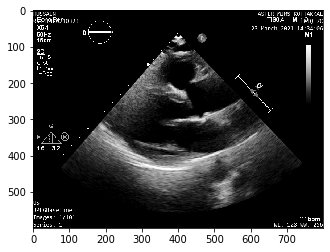

In [49]:
s_img = cv2.imread(r"C:/Users/hp/Desktop/python_projects_n_codes/Echocodes/view_classification/echo_dataset_12k/batch1plax_1_Frame1.jpg",0)
plt.imshow(s_img,cmap='gray')
s_img = s_img[100:450,225:575]
s_img = cv2.resize(s_img,(200,200))
descriptors = AKAZE(s_img)

In [50]:
descriptors

array([[  3, 236, 141, ..., 126, 230,   7],
       [ 97, 253,   3, ..., 253,  95,  26],
       [ 97, 253,  15, ..., 237, 221,  62],
       ...,
       [203,  16, 152, ...,   3, 128,  53],
       [  1,  24, 158, ...,  97, 252,  62],
       [  3,   0, 158, ..., 129, 136,  52]], dtype=uint8)

In [51]:
descriptors.shape

(70, 61)

In [52]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
kmeans = KMeans(init="k-means++", n_clusters=12,n_init=10,max_iter=300,random_state=42)

In [53]:

views = ['A2c','A4c','PLAX','PSAX']
X = []
Y = []
feature_vector = []
    
for view in views :
    path = r"C:/Users/hp/Desktop/python_projects_n_codes/Echocodes/preprocessing/echo_images/*"+view+"*.jpg"
    for file in glob.glob(path):  
            a = cv2.imread(file,0)   #now, we can read each file since we have the full path
            a  = a[100:450,225:575]
            a = cv2.resize(a,(200,200))
            Y.append(view)
            descriptor = AKAZE(a)
            scaled_feature_descriptors = scaler.fit_transform(descriptor)
            kmeans.fit(scaled_feature_descriptors)
            cluster_map = pd.DataFrame(scaled_feature_descriptors)
            cluster_map['cluster'] = kmeans.labels_
            img_feature = []
            for i in range(kmeans.n_clusters):
                cluster_mean = np.mean(np.mean(cluster_map[cluster_map.cluster == i].drop('cluster',axis = 1)),axis = 0)
                img_feature.append(cluster_mean)    #12 feature/elemnts  64
            feature_vector.append(img_feature)       # all images 1237,64
          

In [54]:
print("feature extracted from 1 image's size :", len(img_feature))
print("sample cluster mean = ",img_feature)
print("feature vector total size :", len(feature_vector))
#print("feature vector = ",feature_vector)
print("feature vector of a single image : ",len(feature_vector[0]),"  ",feature_vector[0])

feature extracted from 1 image's size : 12
sample cluster mean =  [0.35402308392759857, -0.2967286799984352, 0.11594412004213808, -0.1090355346954824, 0.3070735831312646, -0.08553664417265154, 0.13751643768638513, 0.034805932960951406, -0.2383205182752016, -0.4084160323730544, -0.17376298091233716, 0.1055309699757063]
feature vector total size : 1237
feature vector of a single image :  12    [0.32602868403974106, -0.1367037180939017, -0.010692635711530774, 0.5642710588342154, -0.17200491571288884, -0.4576654693495453, 0.38835703481271483, 0.09544923020877764, 0.20056659802930538, -0.6533702248181704, 0.04819154849119225, -0.11432011333787716]


In [55]:
col_name = ["feature" + str(i) for i in range(1,kmeans.n_clusters + 1)]
row_name = ["image" + str(i) for i in range(1,len(Y)+1)]

In [56]:
df = pd.DataFrame(feature_vector,index=row_name,columns=col_name)
df["path"] = path
df["views"] = Y
df = shuffle(df)
df.to_csv("C:/Users/hp/Desktop/python_projects_n_codes/Echocodes/view_classification/viewfeature.csv")

In [57]:
df

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,feature11,feature12,path,views
image601,-0.144285,0.191118,-0.411696,0.154376,0.028549,0.074155,0.216428,-0.149255,0.012624,0.023847,-0.004943,0.218839,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,PLAX
image224,0.233768,-0.230651,-0.093616,0.122628,-0.123524,-0.311294,-0.150171,0.227035,0.650886,0.175532,0.182801,-0.083743,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,A2c
image837,-0.355294,-0.236224,0.038680,0.355227,-0.324459,0.061201,-0.495120,0.084707,0.233992,-0.276695,0.003634,0.332012,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,PSAX
image559,-0.132198,-0.115864,-0.422568,0.218597,0.271700,0.287960,0.155742,-0.164583,0.342854,-0.071713,-0.085798,0.133609,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,PLAX
image702,-0.194842,0.009105,-0.180846,-0.060089,0.422202,0.296816,0.339067,0.156493,-0.337180,-0.052446,0.280991,-0.309316,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,PLAX
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
image1059,0.233883,-0.129048,0.300134,-0.471083,-0.128531,0.359269,0.403996,-0.108834,-0.203288,0.172698,-0.045725,0.066851,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,PSAX
image372,-0.420676,-0.126125,0.222824,0.076275,0.045999,0.183050,0.039919,0.092775,0.196743,0.553394,-0.310802,-0.219747,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,A4c
image1074,-0.006065,-0.249421,0.770284,-0.399986,0.306156,0.471394,-0.191535,-0.032052,0.154489,0.330861,0.147849,0.088234,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,PSAX
image392,-0.417945,0.124894,0.100357,0.185038,0.342018,-0.219107,0.489033,-0.092038,0.106048,0.076747,-0.203675,-0.197159,C:/Users/hp/Desktop/python_projects_n_codes/Ec...,A4c
